## Competition - Spooky Author Identification
**Identify horror authors from their writings**

**File descriptions**

    train.csv - the training set
    test.csv - the test set
    sample_submission.csv - a sample submission file in the correct format

**Data fields**

    id - a unique identifier for each sentence
    text - some text written by one of the authors
    author - the author of the sentence (EAP: Edgar Allan Poe, HPL: HP Lovecraft; MWS: Mary Wollstonecraft Shelley)

# Exploratory Data Analysis

## This notebook includes the data exploration, that provides insights about the data which helps guide the analytics and mining experiments

## The main reference for this notebook is an excellent kernel from Kaggle by user marcospinaci
https://www.kaggle.com/marcospinaci/talking-plots-1-sklearn-classifiers-0-334

### The notebook explores the following stats across authors :
### 1. Sentence distribution
### 2. Common words
### 3. Characteristic words
### 4. Grammar: Parts of Speech
### 5. Word sequences

### Environment Setup

In [1]:
# Reference - https://www.kaggle.com/marcospinaci/talking-plots-1-sklearn-classifiers-0-334

import numpy as np
import pandas as pd
import os
import itertools

# Set graph parameters
%matplotlib inline
import matplotlib
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Set path to save visualizations
PROJECT_DIR = "."
IMAGES_DIR = "images"

# Function to save visualizations
def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_DIR, IMAGES_DIR, fig_id + ".png")
    print(path)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Set the path of the spooky author dataset
SPOOKY_PATH = 'spooky'


def load_spooky_dataset(dataset_type):
    filepath = os.path.join(SPOOKY_PATH, dataset_type, dataset_type + ".csv")
    print(filepath)
    return pd.read_csv(filepath)

train = load_spooky_dataset("train")
test = load_spooky_dataset("test")

spooky\train\train.csv
spooky\test\test.csv


In [129]:
train.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [309]:
test.head()

,id,text
0,id02310,"Still, as I urged our leaving Ireland with suc..."
1,id24541,"If a fire wanted fanning, it could readily be ..."
2,id00134,And when they had broken down the frail door t...
3,id27757,While I was thinking how I should possibly man...
4,id04081,I am not sure to what limit his knowledge may ...


### 1. Sentence distribution

In [2]:
# Check the distribution across the three author classes
author_stats = train["author"].value_counts()
author_stats

EAP    7900
MWS    6044
HPL    5635
Name: author, dtype: int64

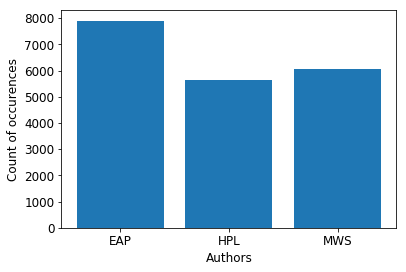

In [3]:
plt.bar(author_stats.index, author_stats)
plt.ylabel("Count of occurences", fontsize=12)
plt.xlabel("Authors", fontsize=12)
plt.show()

In [130]:
# NLTK imports
import nltk, re
from nltk.stem.snowball import EnglishStemmer
from wordcloud import WordCloud

In [131]:
text = train.text[0]

In [132]:
print(text)
wc = WordCloud(max_font_size=40).generate(text)

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.


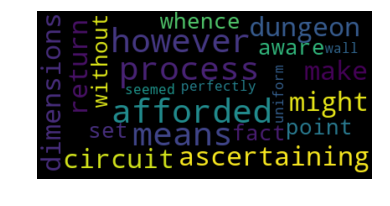

In [133]:
plt.figure()
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### 2. Common Words

In [134]:
# Split into words
train['split'] = train.text.apply(nltk.word_tokenize)
train.head()

,id,text,author,split
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,..."


In [135]:
# Unique words and mapping to integers
unique_words = {word for sentence in train.split.values for word in sentence}
dict_words = {word:i for i, word in enumerate(unique_words)}


In [136]:
# Stemming and removing stopwords + punctuations
stopwords = nltk.corpus.stopwords.words('english') + ['']
stemmer = EnglishStemmer()

In [137]:
# Create dictionaries from words to stem and conversely
stemmed_dict = {item:stemmer.stem(item) for item in unique_words}
reverse_stemmer = {item:[] for item in stemmed_dict.values()}

In [138]:
for item in stemmed_dict:
    reverse_stemmer[stemmed_dict[item]].append(item)


In [139]:
train['stemmed'] = train['split'].apply(lambda x:[stemmed_dict[y] for y in x
                                                 if re.sub('[^a-z]+','',y.lower()) not in stopwords])

In [140]:
print(train.text[0])

This process, however, afforded me no means of ascertaining the dimensions of my dungeon; as I might make its circuit, and return to the point whence I set out, without being aware of the fact; so perfectly uniform seemed the wall.


In [141]:
print(train.split[0])

['This', 'process', ',', 'however', ',', 'afforded', 'me', 'no', 'means', 'of', 'ascertaining', 'the', 'dimensions', 'of', 'my', 'dungeon', ';', 'as', 'I', 'might', 'make', 'its', 'circuit', ',', 'and', 'return', 'to', 'the', 'point', 'whence', 'I', 'set', 'out', ',', 'without', 'being', 'aware', 'of', 'the', 'fact', ';', 'so', 'perfectly', 'uniform', 'seemed', 'the', 'wall', '.']


In [142]:
print(train.stemmed[0])

['process', 'howev', 'afford', 'mean', 'ascertain', 'dimens', 'dungeon', 'might', 'make', 'circuit', 'return', 'point', 'whenc', 'set', 'without', 'awar', 'fact', 'perfect', 'uniform', 'seem', 'wall']


In [143]:
train.head()

,id,text,author,split,stemmed
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[process, howev, afford, mean, ascertain, dime..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[never, occur, fumbl, might, mere, mistak]"
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[left, hand, gold, snuff, box, caper, hill, cu..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[love, spring, look, windsor, terrac, sixteen,..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[find, noth, els, even, gold, superintend, aba..."


In [144]:
# Count of words
test = pd.Series(y for x in train.stemmed for y in x)
word_count = {'ALL':pd.Series([y for x in train.stemmed for y in x]).value_counts()}
authors = ['MWS', 'EAP', 'HPL']
authors_dict = {author:i for i, author in enumerate(authors)}
for author in authors:
    word_count[author] = pd.Series([y for x in train.loc[train.author==author, 'stemmed']
                                   for y in x]).value_counts()

In [158]:
word_count_frame = pd.DataFrame(word_count).fillna(0).astype(int).sort_values('ALL', ascending=False)[['ALL']+authors]

In [159]:
word_count_frame.head(25).style.background_gradient(subset=authors, 
                                                    cmap=LinearSegmentedColormap.from_list('',['yellow', 'red']))

,ALL,MWS,EAP,HPL
one,1677,489,672,516
upon,1411,200,1025,186
could,1331,383,458,490
would,1258,475,416,367
time,874,278,315,281
even,828,298,296,234
man,786,249,258,279
day,743,288,258,197
eye,732,286,270,176
thing,725,71,221,433


one      509.800000
upon     428.937269
could    404.617651
would    382.425999
time     265.691831
even     251.708050
man      238.940250
day      225.868456
eye      222.524508
thing    220.396541
yet      217.356589
said     214.012642
seem     211.580680
like     197.292904
might    191.212999
old      187.261061
first    183.309123
night    182.397138
must     181.485152
us       181.181157
Name: ALL, dtype: float64
11436 MWS    5098
EAP    6338
dtype: int64


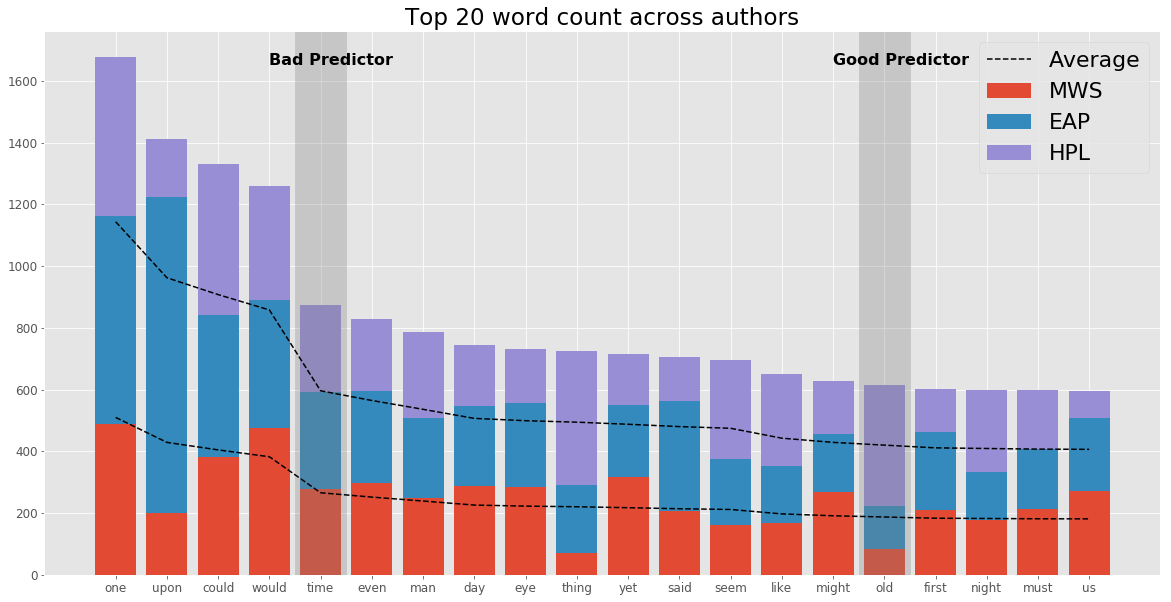

In [238]:
# Visualize
plt.style.use('ggplot')
plt.rcParams['font.size'] = 16
plt.figure(figsize=(20, 10))
bottom = np.zeros(20)
index = np.arange(20)
word_count_20 = word_count_frame.head(20)
for author in authors:
    # Stacked bars
    values = word_count_20[author]
    plt.bar(index, values, bottom=bottom, label=author)
    bottom += values

# Averages
plt.plot(index, word_count_20['ALL'] * word_count_20[authors[0]].sum() / word_count_20['ALL'].sum(), 
         'k--', label='Average')
plt.plot(index, word_count_20['ALL'] * word_count_20[authors[:2]].values.sum() / word_count_20['ALL'].sum(), 
        'k--', label='')

plt.xticks(index, word_count_20.index, rotation='horizontal')
plt.legend(fontsize=22 )
plt.axvspan(3.5, 4.5, alpha=0.3, color='gray')
plt.axvspan(14.5, 15.5, alpha=0.3, color='gray')
plt.text(3, 1650, 'Bad Predictor', fontweight='bold')
plt.text(14, 1650, 'Good Predictor', fontweight='bold')
plt.title('Top 20 word count across authors')
#df['EAP']
print(word_count_20['ALL'] * word_count_20[authors[0]].sum()/word_count_20['ALL'].sum())
print(word_count_20[authors[:2]].values.sum(), word_count_20[authors[:2]].sum())

### 3. Characteristic Words

In [241]:
# Visualizing the characteristic words of an author
def characteristic_words(author, m=10, head=20):
    best_words_frame = ((word_count_frame[author] + m) / 
                       (word_count_frame[[item for item in authors if item != author]].sum(axis=1)
                        + 2*m )).sort_values(ascending=False).head(head).to_frame()
    best_words_frame.columns=['Score']
    best_words_frame['Words'] = pd.Series(best_words_frame.index).apply(lambda i: reverse_stemmer[i]).values
    return best_words_frame


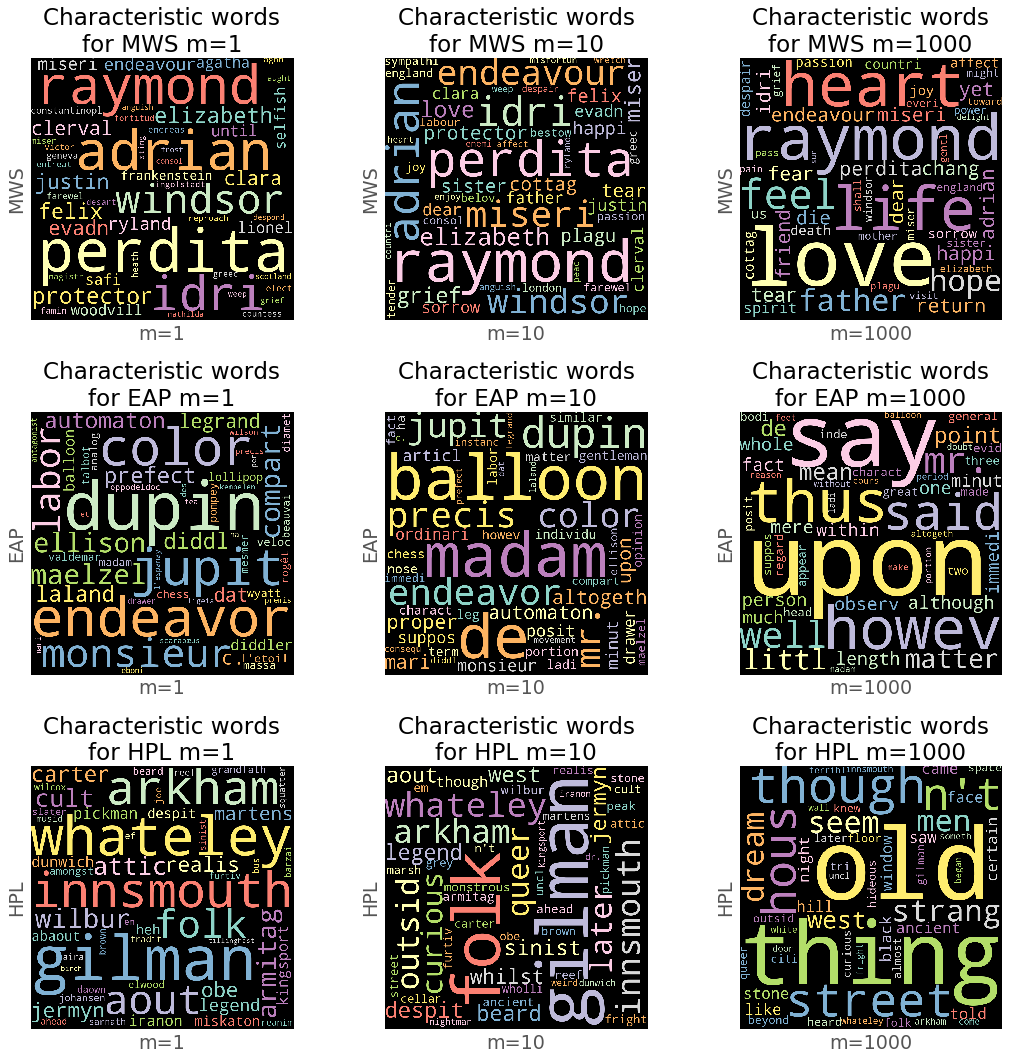

In [247]:
wc = WordCloud(width=1000, height=1000)
_, axes = plt.subplots(3, 3, figsize=(15, 15))
for i in range(3):
    for j, m in enumerate([1, 10, 1000]):
        wc.generate_from_frequencies(characteristic_words(authors[i], m=m, head=50)['Score'].to_dict())
        axes[i, j].imshow(wc.recolor(colormap='Set3'))
        axes[i, j].set_title('Characteristic words\nfor {} m={}'.format(authors[i], m))
        axes[i, j].set_ylabel(authors[i])
        axes[i, j].set_xlabel('m={}'.format(m))
        axes[i, j].set_xticks([])
        axes[i, j].set_yticks([])
plt.tight_layout()

### 4. Grammar: Parts of Speech

In [252]:
# Grammer and Punctuation
grammer_frame = load_spooky_dataset("train")

spooky\train\train.csv


In [253]:
grammer_frame.head()

,id,text,author
0,id26305,"This process, however, afforded me no means of...",EAP
1,id17569,It never once occurred to me that the fumbling...,HPL
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP
3,id27763,How lovely is spring As we looked from Windsor...,MWS
4,id12958,"Finding nothing else, not even gold, the Super...",HPL


In [254]:
# Split the sentences
grammer_frame['split'] = grammer_frame.text.apply(nltk.word_tokenize)

In [256]:
grammer_frame.head()

,id,text,author,split
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,..."


In [257]:
# Get the various parts of speech for each split sentences
grammer_frame['postag'] = [[x[1] for x in nltk.pos_tag(y)]for y in grammer_frame.split]

In [258]:
grammer_frame.head()

,id,text,author,split,postag
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[DT, NN, ,, RB, ,, VBD, PRP, DT, NNS, IN, VBG,..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[PRP, RB, RB, VBD, TO, PRP, IN, DT, NN, MD, VB..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[IN, PRP$, JJ, NN, VBD, DT, JJ, NN, NN, ,, IN,..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[WRB, RB, VBZ, JJ, IN, PRP, VBD, IN, NNP, NNP,..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[VBG, NN, RB, ,, RB, RB, NN, ,, DT, NNP, VBD, ..."


In [261]:
# Get the count and explanation for each parts of speech tags
tags_info = nltk.data.load('help/tagsets/upenn_tagset.pickle')
tags = pd.Series([x for y in grammer_frame.postag for x in y]).value_counts().to_frame()
tags.columns = ['count']
tags['explanation'] = [tags_info[i][0] for i in tags.index]

In [264]:
tags.head()

,count,explanation
NN,84778,"noun, common, singular or mass"
IN,71911,"preposition or conjunction, subordinating"
DT,59503,determiner
JJ,38609,"adjective or numeral, ordinal"
",",38220,comma


In [265]:
# Add the percentages for each parts of speech tags
tags['percentage'] = tags['count'] / tags['count'].sum()

In [266]:
tags.head()

,count,explanation,percentage
NN,84778,"noun, common, singular or mass",0.142487
IN,71911,"preposition or conjunction, subordinating",0.120861
DT,59503,determiner,0.100007
JJ,38609,"adjective or numeral, ordinal",0.064890
",",38220,comma,0.064237


In [267]:
# Add percentage across authors for each parts of speech tags
for author in authors:
    percent_author_tags = pd.Series([x for y in grammer_frame.loc[grammer_frame.author == author, 'postag'] for x in y]).value_counts().to_frame()
    percent_author_tags.columns = ['percentage_' + author]
    percent_author_tags.iloc[:,0] = percent_author_tags.iloc[:,0] / percent_author_tags.iloc[:,0].sum()
    tags = pd.merge(tags, percent_author_tags, left_index=True, right_index=True, how='left').fillna(0)

In [269]:
tags.head()

,count,explanation,percentage,percentage_MWS,percentage_EAP,percentage_HPL
NN,84778,"noun, common, singular or mass",0.142487,0.141285,0.143348,0.142644
IN,71911,"preposition or conjunction, subordinating",0.120861,0.113121,0.126675,0.121503
DT,59503,determiner,0.100007,0.085137,0.109977,0.102840
JJ,38609,"adjective or numeral, ordinal",0.064890,0.057678,0.062623,0.075745
",",38220,comma,0.064237,0.063790,0.075776,0.049322


In [277]:
# Visualization of parts of speech stats
from matplotlib.image import imread

In [281]:
frankenstein = imread('msw_frankenstein.png')
raven = imread('eap_raven.png')
cthulhu = imread('hpl_cthulhu.png')

In [282]:
author_to_image = {'MWS':frankenstein, 'EAP':raven, 'HPL':cthulhu}

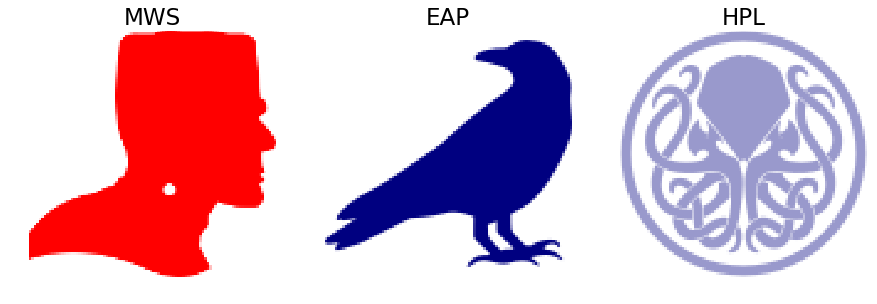

In [283]:
_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, author in enumerate(author_to_image):
    axes[i].imshow(author_to_image[author])
    axes[i].set_title(author)
    axes[i].set_axis_off()
    

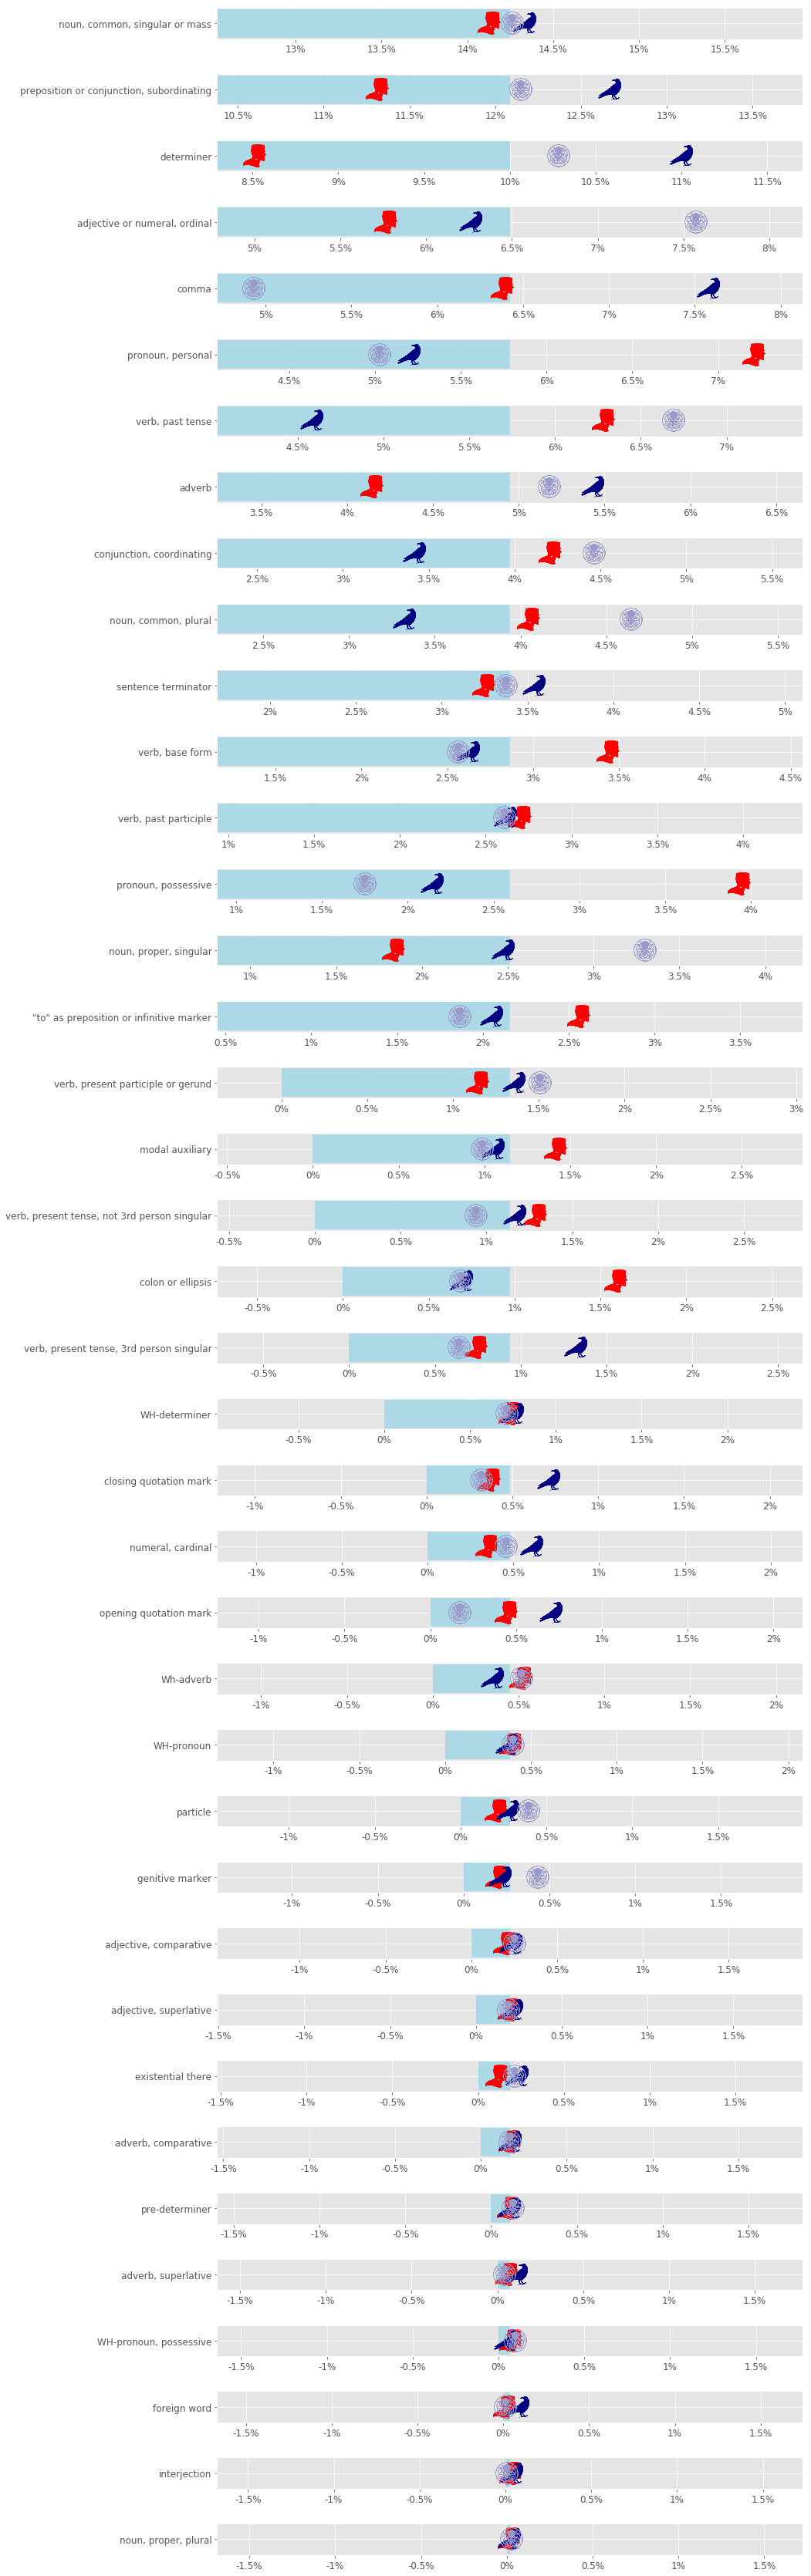

In [295]:
# Plot the graph
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

max_diff = np.max(tags[['percentage_' + x for x in authors]].values - np.expand_dims(tags['percentage'].values, 1))

def add_image(axis, image_array, x, y, cmap='Greys'):
    x_y = (x, y)
    image_box = OffsetImage(image_array, zoom=0.3, cmap=cmap)
    image_box.image.axes = axis
    
    anno_box = AnnotationBbox(image_box, x_y, xycoords='data', pad=0, frameon=False)
    axis.add_artist(anno_box)
    
plt.rcParams['font.size'] = 20

_, axes = plt.subplots(len(tags), 1, figsize=(15, 1.2*len(tags)))
for i, j in enumerate(tags.index):
    axes[i].barh(0, tags.loc[j, 'percentage'], color='lightblue')
    axes[i].set_xlim([tags.loc[j, 'percentage'] - max_diff * 1.2, tags.loc[j, 'percentage'] + max_diff * 1.2])
    axes[i].set_yticks([0])
    axes[i].set_yticklabels([tags.loc[j, 'explanation']])
    axes[i].set_xticklabels(['{:g}%'.format(x * 100) for x in axes[i].get_xticks()])
    add_image(axes[i], frankenstein, tags.loc[j, 'percentage_MWS'], 0)
    add_image(axes[i], raven, tags.loc[j, 'percentage_EAP'], 0)
    add_image(axes[i], cthulhu, tags.loc[j, 'percentage_HPL'], 0)

plt.tight_layout()

In [ ]:
# Good difference between the authors in the following :
# preposition or conjunction, subordinating
# determiner
# adjective or numeral, ordinal
# comma

### 5. Word Sequences

In [311]:
train = load_spooky_dataset("train")
test = load_spooky_dataset("test")

spooky\train\train.csv
spooky\test\test.csv


In [312]:
# Extracting grammer info on train, test
for frame in [train, test]:
    frame['split']  = frame.text.apply(nltk.word_tokenize)
    frame['postag'] = [[x[1] for x in nltk.pos_tag(y)] for y in frame.split]
    frame['stemmed'] = frame.split.apply(lambda x: [stemmer.stem(y) for y in x])

In [313]:
# Group of Words
train.head()

,id,text,author,split,postag,stemmed
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[DT, NN, ,, RB, ,, VBD, PRP, DT, NNS, IN, VBG,...","[this, process, ,, howev, ,, afford, me, no, m..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[PRP, RB, RB, VBD, TO, PRP, IN, DT, NN, MD, VB...","[it, never, onc, occur, to, me, that, the, fum..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[IN, PRP$, JJ, NN, VBD, DT, JJ, NN, NN, ,, IN,...","[in, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[WRB, RB, VBZ, JJ, IN, PRP, VBD, IN, NNP, NNP,...","[how, love, is, spring, as, we, look, from, wi..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[VBG, NN, RB, ,, RB, RB, NN, ,, DT, NNP, VBD, ...","[find, noth, els, ,, not, even, gold, ,, the, ..."


In [314]:
test.head()

,id,text,split,postag,stemmed
0,id02310,"Still, as I urged our leaving Ireland with suc...","[Still, ,, as, I, urged, our, leaving, Ireland...","[RB, ,, IN, PRP, VBD, PRP$, VBG, NNP, IN, JJ, ...","[still, ,, as, i, urg, our, leav, ireland, wit..."
1,id24541,"If a fire wanted fanning, it could readily be ...","[If, a, fire, wanted, fanning, ,, it, could, r...","[IN, DT, NN, VBD, NN, ,, PRP, MD, RB, VB, VBN,...","[if, a, fire, want, fan, ,, it, could, readili..."
2,id00134,And when they had broken down the frail door t...,"[And, when, they, had, broken, down, the, frai...","[CC, WRB, PRP, VBD, VBN, RP, DT, JJ, NN, PRP, ...","[and, when, they, had, broken, down, the, frai..."
3,id27757,While I was thinking how I should possibly man...,"[While, I, was, thinking, how, I, should, poss...","[IN, PRP, VBD, VBG, WRB, PRP, MD, RB, VB, IN, ...","[while, i, was, think, how, i, should, possibl..."
4,id04081,I am not sure to what limit his knowledge may ...,"[I, am, not, sure, to, what, limit, his, knowl...","[PRP, VBP, RB, JJ, TO, WP, VB, PRP$, NN, MD, V...","[i, am, not, sure, to, what, limit, his, knowl..."


In [317]:
# Stemmed counts
stemmed_counts = pd.Series([y for x in train.stemmed for y in x]).value_counts()
stemmed_counts.head()

,      38220
the    35585
of     20955
.      19119
and    17956
dtype: int64

In [318]:
# remove rare words, appearning less than 4 times
words_to_remove = [word for word in stemmed_counts.index if stemmed_counts[word] <= 4]
words_to_remove

['southwest',
 'se',
 'axe',
 'compact',
 'erich',
 'southeast',
 'glut',
 'blemish',
 'antipathi',
 'besprinkl',
 'secreci',
 'tingl',
 'embitt',
 'dubbl',
 'virginia',
 'berth',
 'townsfolk',
 'lawrenc',
 'migrat',
 'transcrib',
 'mai',
 'fist',
 'baggag',
 'foreshadow',
 'retrograd',
 'immin',
 'eject',
 'mignaud',
 'kid',
 'imprint',
 'clammi',
 'poodl',
 'passageway',
 'maison',
 'albino',
 'pregnant',
 'smart',
 'compris',
 'ecstat',
 'pnakot',
 'buzz',
 'dandi',
 'pomp',
 'hallway',
 'neigh',
 'fervid',
 'knxw',
 'grisli',
 'betroth',
 'volubl',
 'redol',
 'bonapart',
 'cylindr',
 'longitudin',
 'sympathis',
 'ritzner',
 'dastard',
 'esq.',
 'luckili',
 'solicitud',
 'oxygen',
 'quack',
 'bias',
 'dainti',
 'constern',
 'obtrud',
 'ringlet',
 'evermor',
 'sleepi',
 'dean',
 'nephew',
 'che',
 'unman',
 'discrep',
 'taunt',
 'volumin',
 'tête',
 'stupefi',
 'pannel',
 'outburst',
 'airi',
 'antediluvian',
 'swimmer',
 'predica',
 'correl',
 'yon',
 'geometr',
 'flour',
 'telegrap

In [319]:
# Build removal word dictionary
word_removal_dict = {word: '' for word in {y for x in test.stemmed for y in x}}
word_removal_dict.update({word: word for word in stemmed_counts.index})
word_removal_dict.update({word: '' for word in words_to_remove})
word_removal_dict[''] = ''
word_removal_dict

{'wretch': 'wretch',
 'dirg': 'dirg',
 'appurten': '',
 'janizari': '',
 'amiss': '',
 'lotus': '',
 'sleepless': '',
 'shop': 'shop',
 'miscal': '',
 'express': 'express',
 'coast': 'coast',
 'chateau': 'chateau',
 'rhine': 'rhine',
 'tenaci': '',
 'summit': 'summit',
 'sodium': '',
 'natur': 'natur',
 'merit': 'merit',
 'twig': '',
 'maze': 'maze',
 'zacchari': '',
 'woven': 'woven',
 'inflex': 'inflex',
 'electr': 'electr',
 'rare': 'rare',
 'haggard': 'haggard',
 'collector': '',
 'normal': 'normal',
 'washington': 'washington',
 'out': 'out',
 'vow': 'vow',
 'fulvous': '',
 'riot': 'riot',
 'prickl': '',
 'anim': 'anim',
 'spring': 'spring',
 'delic': 'delic',
 'iniqu': '',
 'uncontamin': '',
 'tillinghast': 'tillinghast',
 'charm': 'charm',
 'wholli': 'wholli',
 'seclus': 'seclus',
 'competit': 'competit',
 'overtook': '',
 'island': 'island',
 'kempelen': 'kempelen',
 'resili': '',
 'steep': 'steep',
 'acid': '',
 'phenomenon': 'phenomenon',
 'epenetus': '',
 'usher': 'usher',
 

In [320]:
good_words = set(stemmed_counts.index).difference(words_to_remove)
good_words

{'shop',
 'rhine',
 'summit',
 'merit',
 'normal',
 'washington',
 'out',
 'anim',
 'spring',
 'charm',
 'island',
 'telescop',
 'essay',
 'crack',
 'pretenc',
 'proof',
 'analyz',
 'machin',
 'abrupt',
 'notwithstand',
 'h.',
 'food',
 'occasion',
 'apt',
 'daughter',
 'faster',
 'slaughter',
 'simpl',
 'obviat',
 'sovereignti',
 'simultan',
 'hatr',
 'unworthi',
 'leas',
 'lavinia',
 'complic',
 'furnitur',
 'cloudi',
 'pitiless',
 'wake',
 'monkey',
 'figur',
 'mason',
 'necess',
 'absent',
 'crystallis',
 'mania',
 'appleton',
 'testimoni',
 'courtyard',
 'overheard',
 'splendour',
 'shrine',
 'glendin',
 'evinc',
 'pet',
 'buri',
 'surrend',
 'pollut',
 'steel',
 'pall',
 'ironi',
 'explos',
 'inspir',
 'recit',
 'plausibl',
 'expens',
 'penuri',
 'tea',
 'gool',
 'lavish',
 'adjoin',
 't.',
 'shrub',
 'emigr',
 'mr',
 'dominion',
 'egress',
 'confut',
 'happili',
 'laugh',
 'squat',
 'understand',
 'clatter',
 'sunris',
 'tend',
 'perish',
 'flung',
 'em',
 'ver',
 'marchesa',
 '

In [321]:
# Reduce words
for frame in [train, test]:
    frame['reduced'] = frame.stemmed.apply(lambda x: [word_removal_dict[y] for y in x])
    
train.head()

,id,text,author,split,postag,stemmed,reduced
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[DT, NN, ,, RB, ,, VBD, PRP, DT, NNS, IN, VBG,...","[this, process, ,, howev, ,, afford, me, no, m...","[this, process, ,, howev, ,, afford, me, no, m..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[PRP, RB, RB, VBD, TO, PRP, IN, DT, NN, MD, VB...","[it, never, onc, occur, to, me, that, the, fum...","[it, never, onc, occur, to, me, that, the, fum..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[IN, PRP$, JJ, NN, VBD, DT, JJ, NN, NN, ,, IN,...","[in, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[WRB, RB, VBZ, JJ, IN, PRP, VBD, IN, NNP, NNP,...","[how, love, is, spring, as, we, look, from, wi...","[how, love, is, spring, as, we, look, from, wi..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[VBG, NN, RB, ,, RB, RB, NN, ,, DT, NNP, VBD, ...","[find, noth, els, ,, not, even, gold, ,, the, ...","[find, noth, els, ,, not, even, gold, ,, the, ..."


In [322]:
for frame in [train, test]:
    frame['reduced2'] = [[y if y in good_words else frame.loc[i, 'postag'][j] for j, y in enumerate(frame.loc[i, 'stemmed'])] for i in frame.index]

train.head()

,id,text,author,split,postag,stemmed,reduced,reduced2
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[DT, NN, ,, RB, ,, VBD, PRP, DT, NNS, IN, VBG,...","[this, process, ,, howev, ,, afford, me, no, m...","[this, process, ,, howev, ,, afford, me, no, m...","[this, process, ,, howev, ,, afford, me, no, m..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[PRP, RB, RB, VBD, TO, PRP, IN, DT, NN, MD, VB...","[it, never, onc, occur, to, me, that, the, fum...","[it, never, onc, occur, to, me, that, the, fum...","[it, never, onc, occur, to, me, that, the, fum..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[IN, PRP$, JJ, NN, VBD, DT, JJ, NN, NN, ,, IN,...","[in, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[WRB, RB, VBZ, JJ, IN, PRP, VBD, IN, NNP, NNP,...","[how, love, is, spring, as, we, look, from, wi...","[how, love, is, spring, as, we, look, from, wi...","[how, love, is, spring, as, we, look, from, wi..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[VBG, NN, RB, ,, RB, RB, NN, ,, DT, NNP, VBD, ...","[find, noth, els, ,, not, even, gold, ,, the, ...","[find, noth, els, ,, not, even, gold, ,, the, ...","[find, noth, els, ,, not, even, gold, ,, the, ..."


In [323]:
test.head()

,id,text,split,postag,stemmed,reduced,reduced2
0,id02310,"Still, as I urged our leaving Ireland with suc...","[Still, ,, as, I, urged, our, leaving, Ireland...","[RB, ,, IN, PRP, VBD, PRP$, VBG, NNP, IN, JJ, ...","[still, ,, as, i, urg, our, leav, ireland, wit...","[still, ,, as, i, urg, our, leav, ireland, wit...","[still, ,, as, i, urg, our, leav, ireland, wit..."
1,id24541,"If a fire wanted fanning, it could readily be ...","[If, a, fire, wanted, fanning, ,, it, could, r...","[IN, DT, NN, VBD, NN, ,, PRP, MD, RB, VB, VBN,...","[if, a, fire, want, fan, ,, it, could, readili...","[if, a, fire, want, fan, ,, it, could, readili...","[if, a, fire, want, fan, ,, it, could, readili..."
2,id00134,And when they had broken down the frail door t...,"[And, when, they, had, broken, down, the, frai...","[CC, WRB, PRP, VBD, VBN, RP, DT, JJ, NN, PRP, ...","[and, when, they, had, broken, down, the, frai...","[and, when, they, had, broken, down, the, frai...","[and, when, they, had, broken, down, the, frai..."
3,id27757,While I was thinking how I should possibly man...,"[While, I, was, thinking, how, I, should, poss...","[IN, PRP, VBD, VBG, WRB, PRP, MD, RB, VB, IN, ...","[while, i, was, think, how, i, should, possibl...","[while, i, was, think, how, i, should, possibl...","[while, i, was, think, how, i, should, possibl..."
4,id04081,I am not sure to what limit his knowledge may ...,"[I, am, not, sure, to, what, limit, his, knowl...","[PRP, VBP, RB, JJ, TO, WP, VB, PRP$, NN, MD, V...","[i, am, not, sure, to, what, limit, his, knowl...","[i, am, not, sure, to, what, limit, his, knowl...","[i, am, not, sure, to, what, limit, his, knowl..."


In [324]:
# Create word sequences
def group(x, l):
    return ['_'.join(x[i:i+l]) for i in range(len(x)-l+1)]

twin_names = ['pairs', 'triplets', 'quadruplets', 'quintuplets', 'sextuplets', 'septuplets', 'octuplets', 'nonuplets']
for i, name in enumerate(twin_names):
    l = i+2
    for frame in [train, test]:
        frame[name] = frame.reduced2.apply(group, args=(l,))

In [325]:
train.head()

,id,text,author,split,postag,stemmed,reduced,reduced2,pairs,triplets,quadruplets,quintuplets,sextuplets,septuplets,octuplets,nonuplets
0,id26305,"This process, however, afforded me no means of...",EAP,"[This, process, ,, however, ,, afforded, me, n...","[DT, NN, ,, RB, ,, VBD, PRP, DT, NNS, IN, VBG,...","[this, process, ,, howev, ,, afford, me, no, m...","[this, process, ,, howev, ,, afford, me, no, m...","[this, process, ,, howev, ,, afford, me, no, m...","[this_process, process_,, ,_howev, howev_,, ,_...","[this_process_,, process_,_howev, ,_howev_,, h...","[this_process_,_howev, process_,_howev_,, ,_ho...","[this_process_,_howev_,, process_,_howev_,_aff...","[this_process_,_howev_,_afford, process_,_howe...","[this_process_,_howev_,_afford_me, process_,_h...","[this_process_,_howev_,_afford_me_no, process_...","[this_process_,_howev_,_afford_me_no_mean, pro..."
1,id17569,It never once occurred to me that the fumbling...,HPL,"[It, never, once, occurred, to, me, that, the,...","[PRP, RB, RB, VBD, TO, PRP, IN, DT, NN, MD, VB...","[it, never, onc, occur, to, me, that, the, fum...","[it, never, onc, occur, to, me, that, the, fum...","[it, never, onc, occur, to, me, that, the, fum...","[it_never, never_onc, onc_occur, occur_to, to_...","[it_never_onc, never_onc_occur, onc_occur_to, ...","[it_never_onc_occur, never_onc_occur_to, onc_o...","[it_never_onc_occur_to, never_onc_occur_to_me,...","[it_never_onc_occur_to_me, never_onc_occur_to_...","[it_never_onc_occur_to_me_that, never_onc_occu...","[it_never_onc_occur_to_me_that_the, never_onc_...","[it_never_onc_occur_to_me_that_the_fumbl, neve..."
2,id11008,"In his left hand was a gold snuff box, from wh...",EAP,"[In, his, left, hand, was, a, gold, snuff, box...","[IN, PRP$, JJ, NN, VBD, DT, JJ, NN, NN, ,, IN,...","[in, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box...","[in, his, left, hand, was, a, gold, snuff, box...","[in_his, his_left, left_hand, hand_was, was_a,...","[in_his_left, his_left_hand, left_hand_was, ha...","[in_his_left_hand, his_left_hand_was, left_han...","[in_his_left_hand_was, his_left_hand_was_a, le...","[in_his_left_hand_was_a, his_left_hand_was_a_g...","[in_his_left_hand_was_a_gold, his_left_hand_wa...","[in_his_left_hand_was_a_gold_snuff, his_left_h...","[in_his_left_hand_was_a_gold_snuff_box, his_le..."
3,id27763,How lovely is spring As we looked from Windsor...,MWS,"[How, lovely, is, spring, As, we, looked, from...","[WRB, RB, VBZ, JJ, IN, PRP, VBD, IN, NNP, NNP,...","[how, love, is, spring, as, we, look, from, wi...","[how, love, is, spring, as, we, look, from, wi...","[how, love, is, spring, as, we, look, from, wi...","[how_love, love_is, is_spring, spring_as, as_w...","[how_love_is, love_is_spring, is_spring_as, sp...","[how_love_is_spring, love_is_spring_as, is_spr...","[how_love_is_spring_as, love_is_spring_as_we, ...","[how_love_is_spring_as_we, love_is_spring_as_w...","[how_love_is_spring_as_we_look, love_is_spring...","[how_love_is_spring_as_we_look_from, love_is_s...","[how_love_is_spring_as_we_look_from_windsor, l..."
4,id12958,"Finding nothing else, not even gold, the Super...",HPL,"[Finding, nothing, else, ,, not, even, gold, ,...","[VBG, NN, RB, ,, RB, RB, NN, ,, DT, NNP, VBD, ...","[find, noth, els, ,, not, even, gold, ,, the, ...","[find, noth, els, ,, not, even, gold, ,, the, ...","[find, noth, els, ,, not, even, gold, ,, the, ...","[find_noth, noth_els, els_,, ,_not, not_even, ...","[find_noth_els, noth_els_,, els_,_not, ,_not_e...","[find_noth_els_,, noth_els_,_not, els_,_not_ev...","[find_noth_els_,_not, noth_els_,_not_even, els...","[find_noth_els_,_not_even, noth_els_,_not_even...","[find_noth_els_,_not_even_gold, noth_els_,_not...","[find_noth_els_,_not_even_gold_,, noth_els_,_n...","[find_noth_els_,_not_even_gold_,_the, noth_els..."


In [327]:
for name in twin_names:
    vc = pd.Series([y for x in train[name] for y in set(x)]).value_counts()
    print('There are {} {}, {} appearing more than once, {} appearing more than twice, {} appearing more than 4 times'.format(
    len(vc), name, len(vc[vc>1]), len(vc[vc>2]), len(vc[vc>4])))

There are 177173 pairs, 59761 appearing more than once, 34685 appearing more than twice, 18040 appearing more than 4 times
There are 411201 triplets, 52107 appearing more than once, 21340 appearing more than twice, 8185 appearing more than 4 times
There are 501799 quadruplets, 19761 appearing more than once, 5391 appearing more than twice, 1464 appearing more than 4 times
There are 508285 quintuplets, 5944 appearing more than once, 1013 appearing more than twice, 198 appearing more than 4 times
There are 493939 sextuplets, 2409 appearing more than once, 306 appearing more than twice, 41 appearing more than 4 times
There are 475813 septuplets, 1507 appearing more than once, 139 appearing more than twice, 10 appearing more than 4 times
There are 457103 octuplets, 1109 appearing more than once, 87 appearing more than twice, 3 appearing more than 4 times
There are 438466 nonuplets, 891 appearing more than once, 59 appearing more than twice, 1 appearing more than 4 times


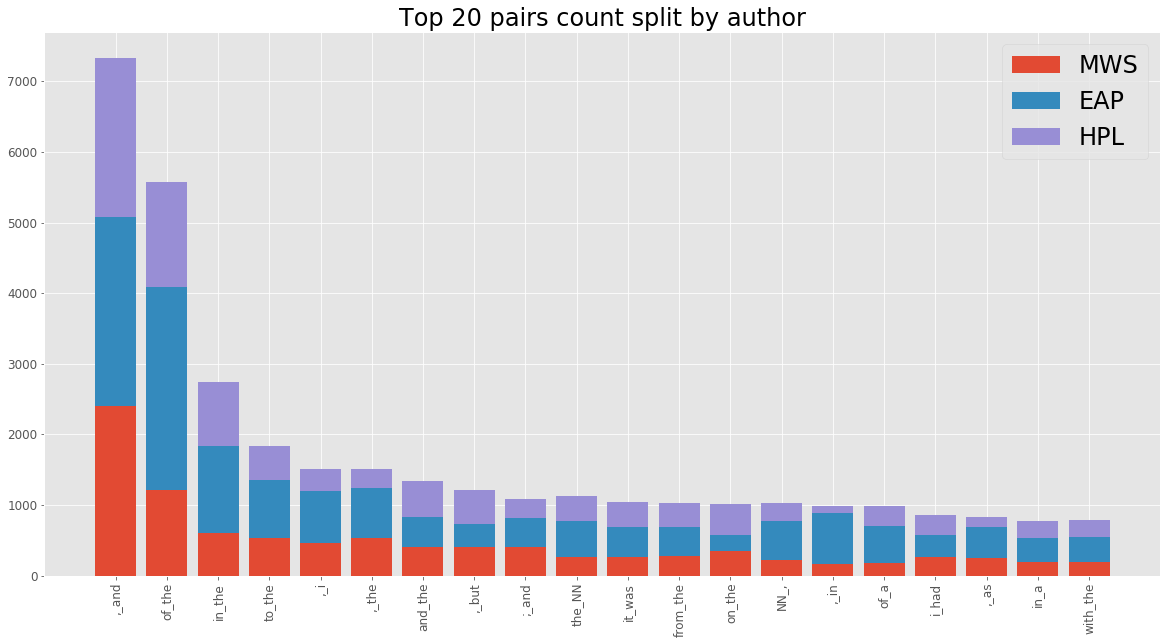

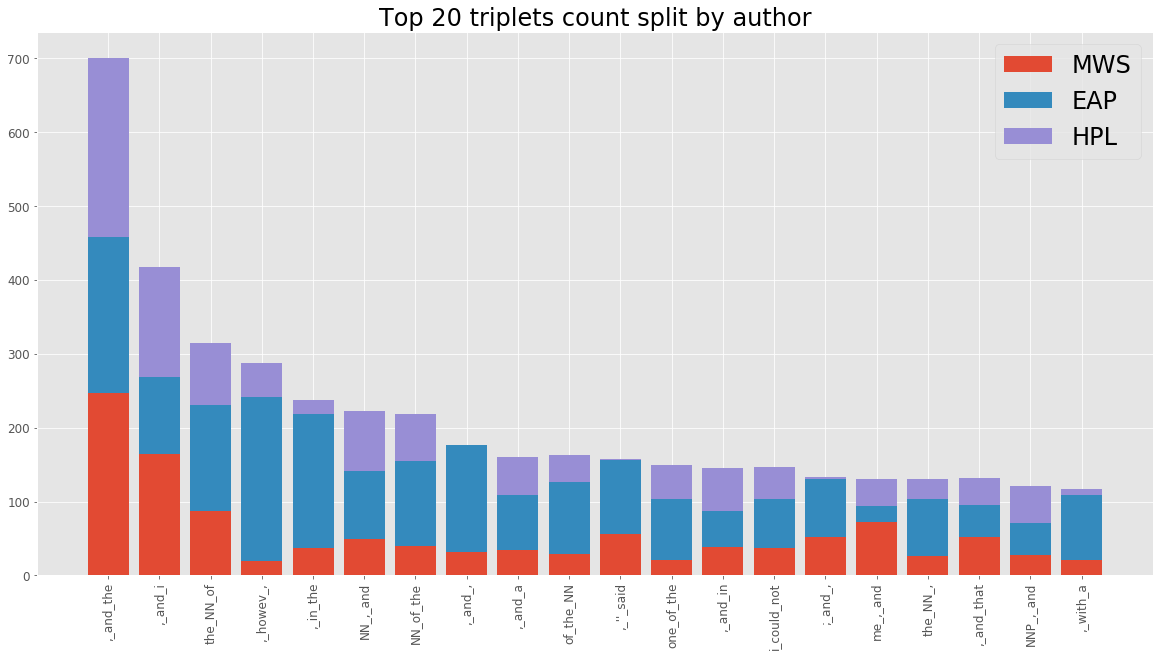

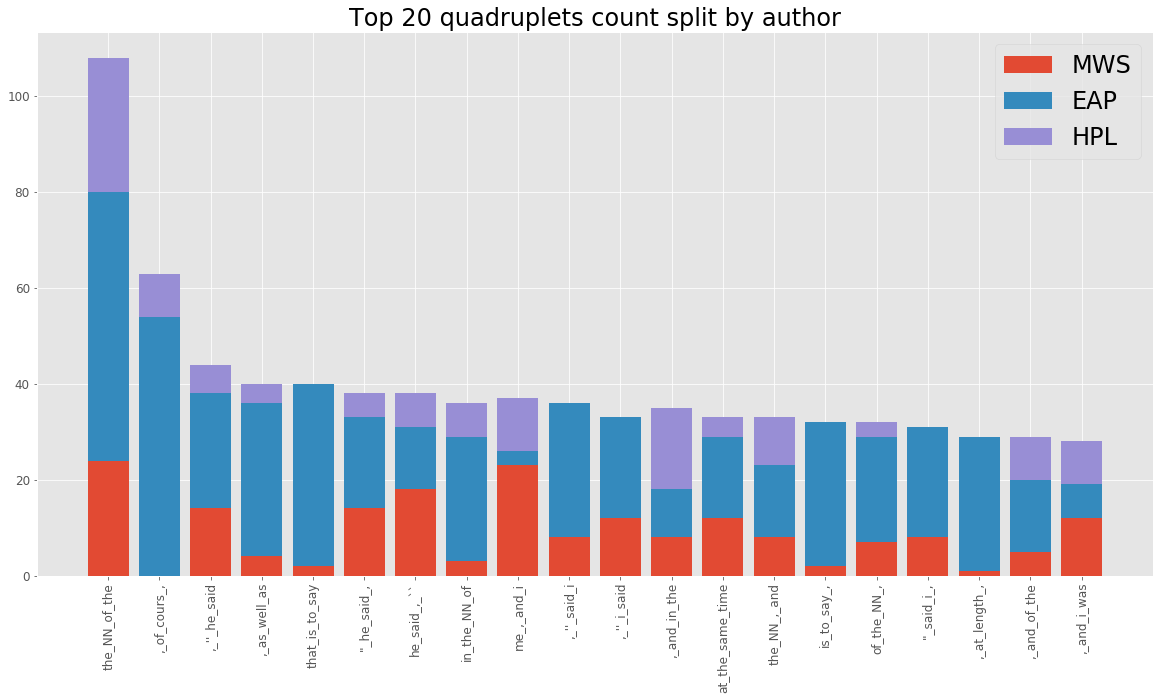

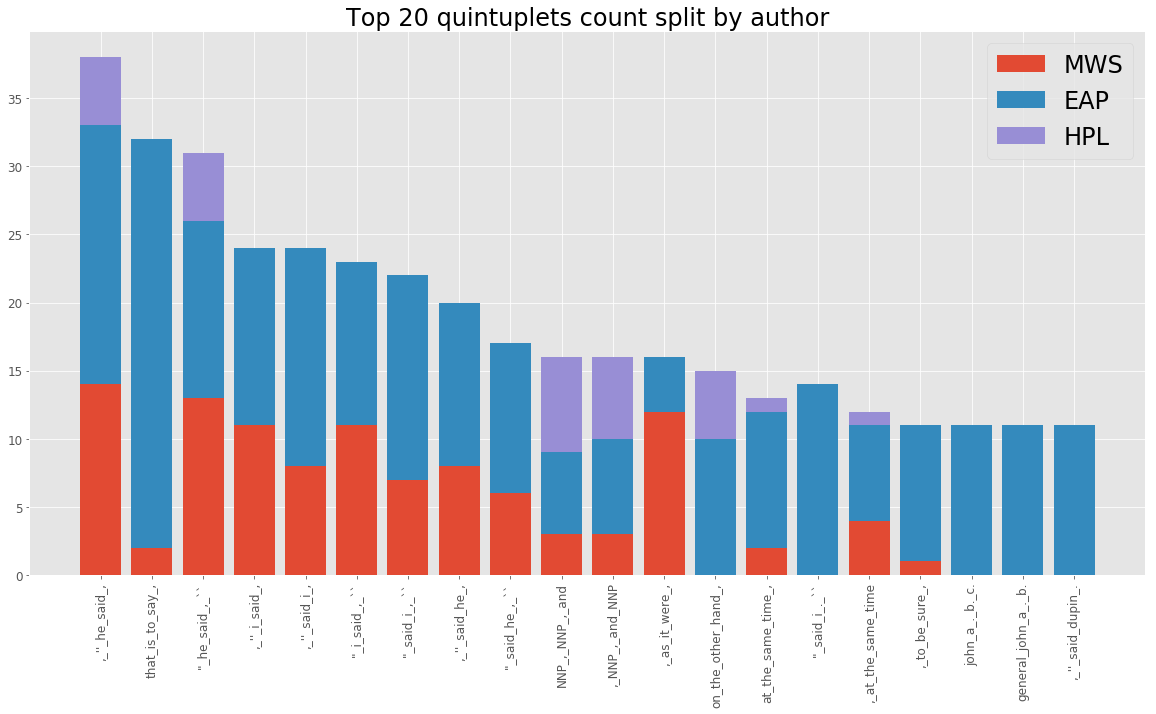

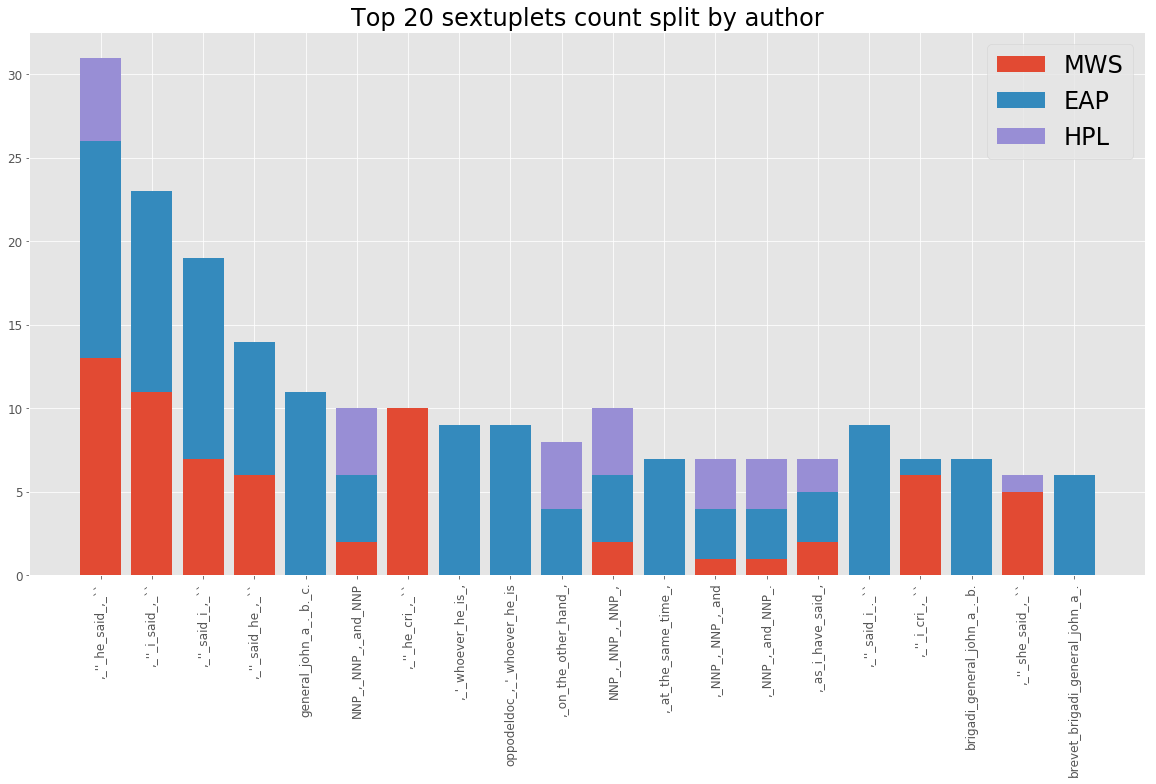

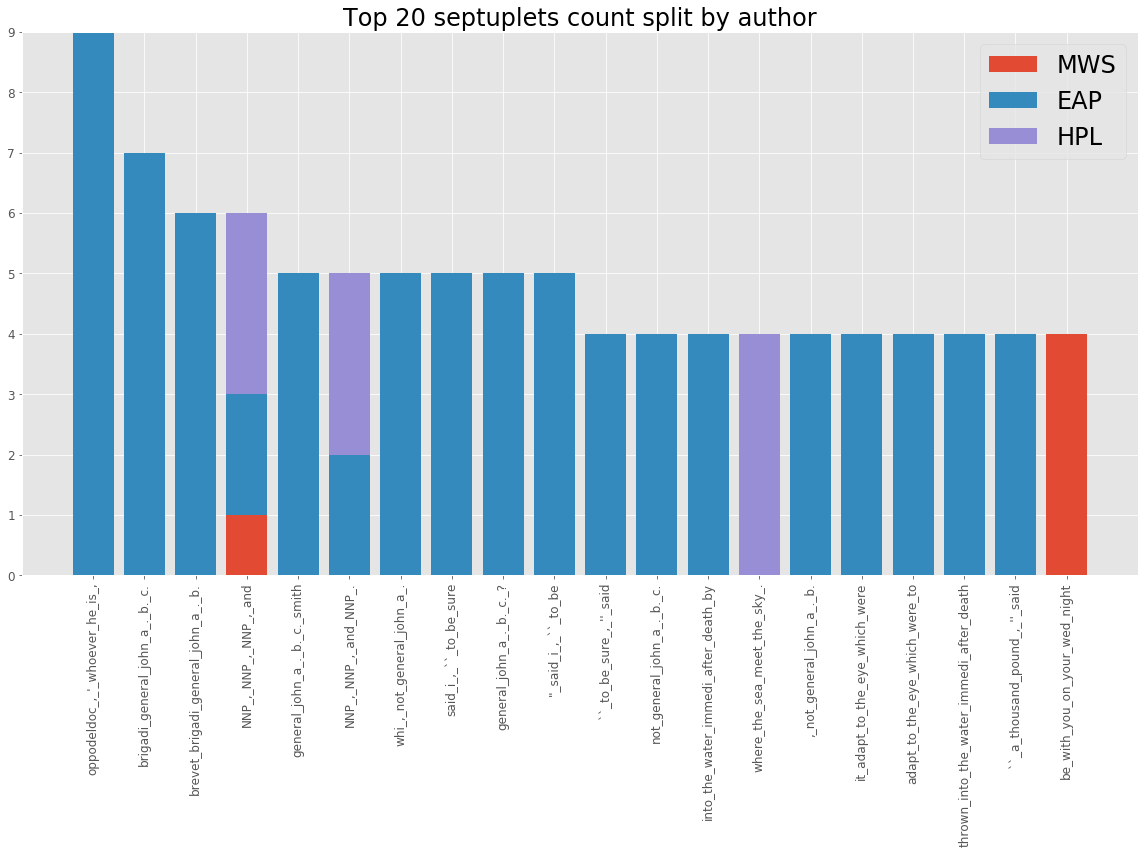

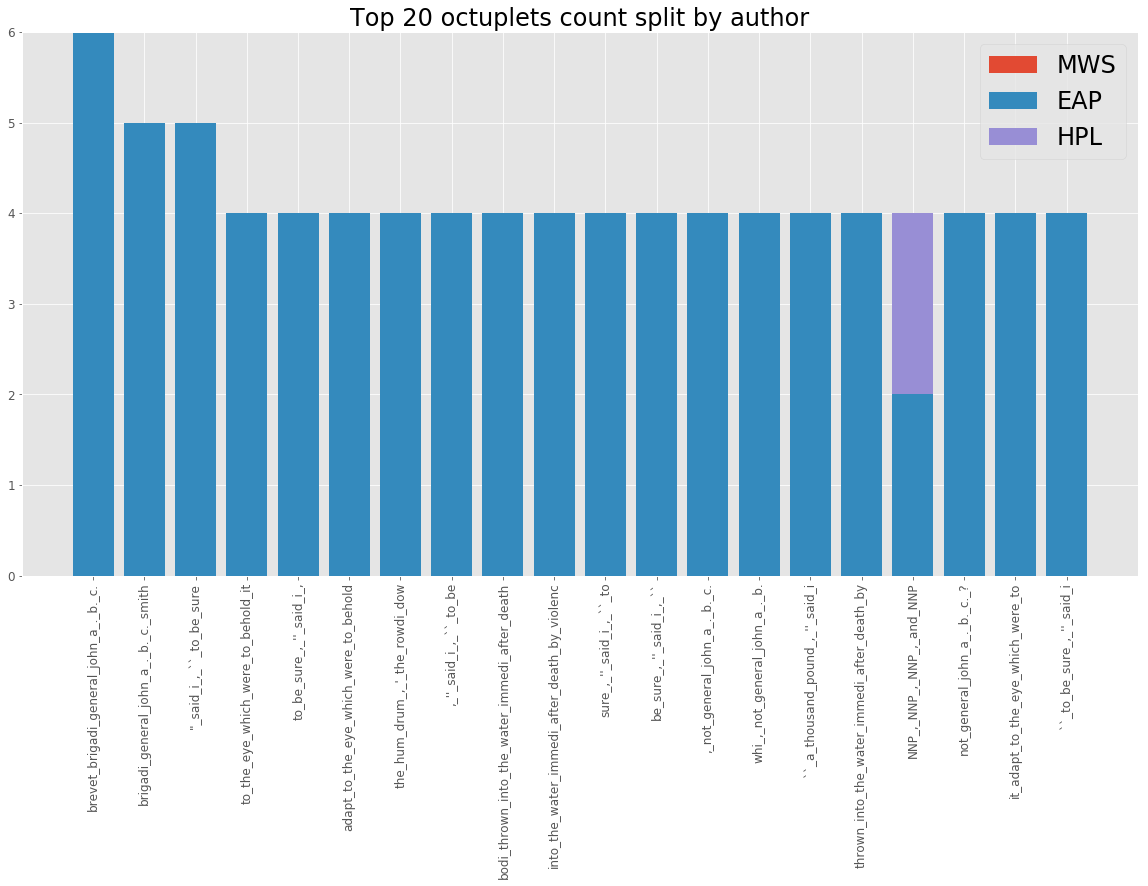

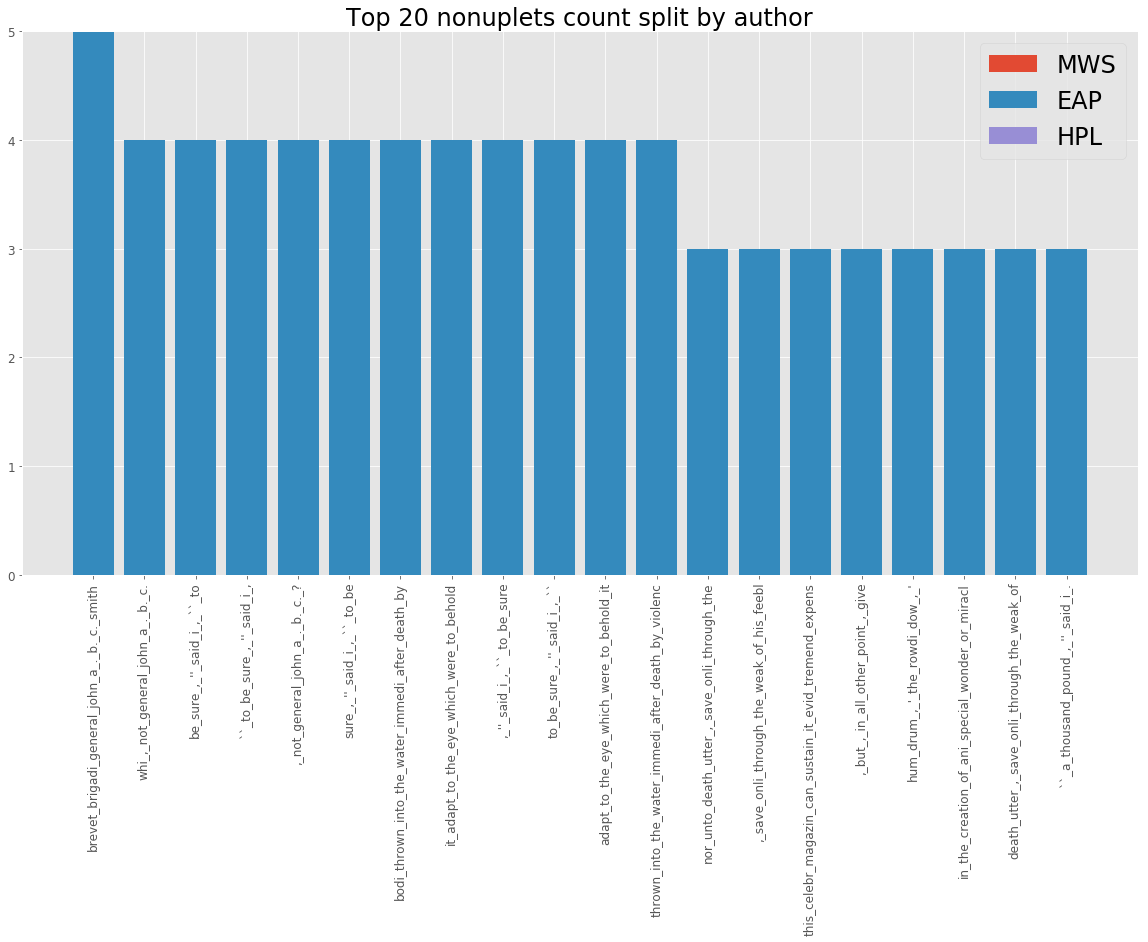

In [329]:
# Visualize the results
plt.style.use('ggplot')
plt.rcParams['font.size'] = 16

for i, name in enumerate(twin_names):
    l = i + 2
    # Count overall and for authors
    twin_count = {'all' : pd.Series(y for x in train[name] for y in set(x)).value_counts()}
    for author in authors:
        twin_count[author] = pd.Series([y for x in train.loc[train.author == author, name] for y in x]).value_counts()
    
    # Fill empty values
    twin_count = pd.DataFrame(twin_count).fillna(0).astype(int).sort_values('all', ascending=False)[['all']+authors]
    
    # Plot
    plt.figure(figsize=(20, 10))
    bottom = np.zeros((20))
    index = np.arange(20)
    frame = twin_count.head(20)
    
    # Stacked bars of authors for each sequence
    for author in authors:
        values = frame[author]
        plt.bar(index, values, bottom=bottom, label=author)
        bottom += values
    
    plt.xticks(index, frame.index, rotation='vertical')
    plt.legend(fontsize=24)
    plt.title('Top 20 {} count split by author'.format(name), fontsize=24)
    plt.show()
    